# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
base_url = "http://api.openweathermap.org/geo/1.0/direct?q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}{city}&appid={weather_api_key}'

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_resp = requests.get(city_url).json()
        city_url = f'{url}?lat={city_resp[0]["lat"]}&lon={city_resp[0]["lon"]}&appid={weather_api_key}'
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | brookings
Processing Record 7 of Set 1 | al hilaliyya
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 1 | gorontalo
Processing Record 13 of Set 1 | burang
Processing Record 14 of Set 1 | katsuren-haebaru
City not found. Skipping...
Processing Record 15 of Set 1 | ha'il
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | gadzhiyevo
Processing Record 19 of Set 1 | floro
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | grytviken
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7317,177.5061,1.93,87,75,2.00,RU,1697416089
1,ilulissat,69.2197,-51.0986,-5.84,86,100,9.26,GL,1697416090
2,port-aux-francais,-49.3498,70.2200,1.45,70,100,11.22,TF,1697416091
3,albany,42.6512,-73.7550,11.64,84,100,3.60,US,1697416091
4,bethel,60.7922,-161.7558,0.03,93,100,3.60,US,1697416092


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7317,177.5061,1.93,87,75,2.00,RU,1697416089
1,ilulissat,69.2197,-51.0986,-5.84,86,100,9.26,GL,1697416090
2,port-aux-francais,-49.3498,70.2200,1.45,70,100,11.22,TF,1697416091
3,albany,42.6512,-73.7550,11.64,84,100,3.60,US,1697416091
4,bethel,60.7922,-161.7558,0.03,93,100,3.60,US,1697416092


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

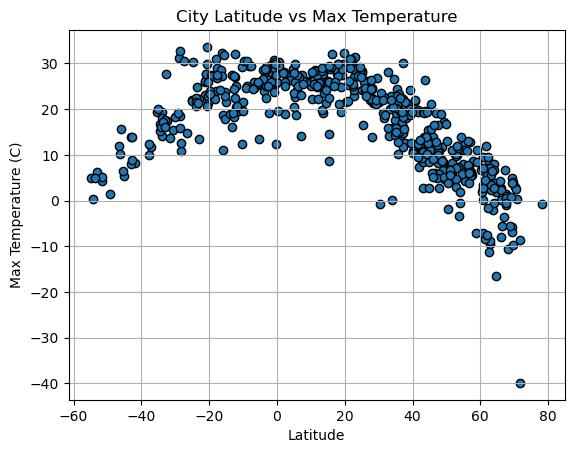

In [54]:
# Build scatter plot for latitude vs. temperature
x_axis = np.array(city_data_df['Lat'])
y_axis = np.array(city_data_df['Max Temp'])
plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

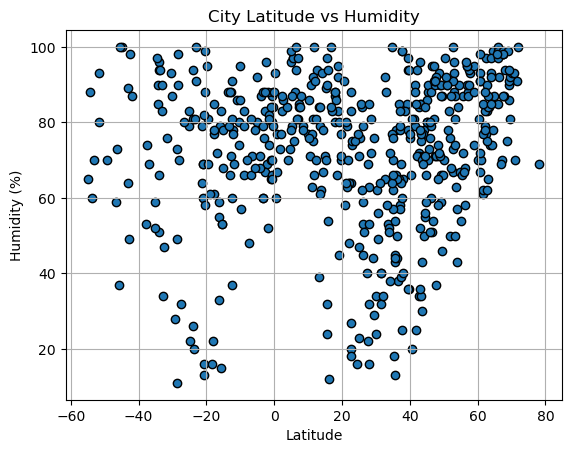

In [55]:
# Build the scatter plots for latitude vs. humidity
x_axis = np.array(city_data_df['Lat'])
y_axis = np.array(city_data_df['Humidity'])
plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

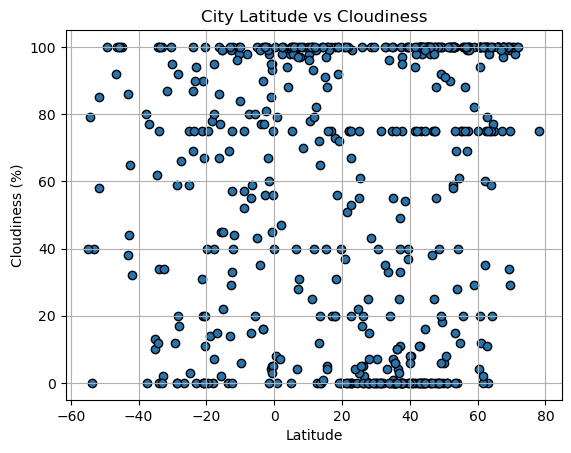

In [56]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = np.array(city_data_df['Lat'])
y_axis = np.array(city_data_df['Cloudiness'])
plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

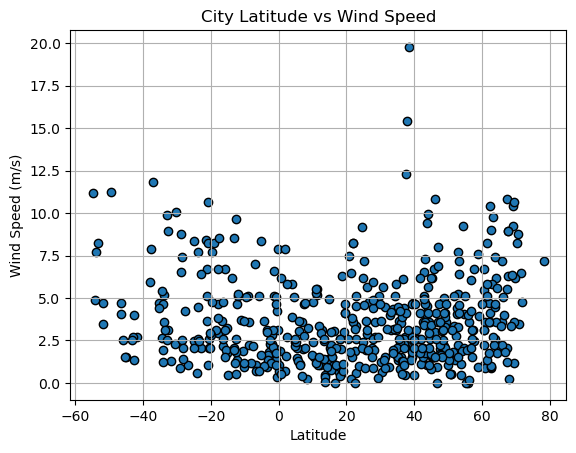

In [57]:
# Build the scatter plots for latitude vs. wind speed
x_axis = np.array(city_data_df['Lat'])
y_axis = np.array(city_data_df['Wind Speed'])
plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x_axis, y_axis, xlabel, ylabel, title, x, y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis, marker="o")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f'The r-value is: {rvalue}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7317,177.5061,1.93,87,75,2.00,RU,1697416089
1,ilulissat,69.2197,-51.0986,-5.84,86,100,9.26,GL,1697416090
3,albany,42.6512,-73.7550,11.64,84,100,3.60,US,1697416091
4,bethel,60.7922,-161.7558,0.03,93,100,3.60,US,1697416092
5,brookings,44.3115,-96.7984,10.10,78,0,3.60,US,1697416092


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3498,70.2200,1.45,70,100,11.22,TF,1697416091
8,papatowai,-46.5619,169.4708,12.03,59,92,4.03,NZ,1697416094
9,jamestown,-15.9277,-5.7161,18.64,79,77,6.68,SH,1697416095
13,adamstown,-25.0667,-130.1002,22.07,79,59,2.47,PN,1697416098
14,laguna,-28.4837,-48.7817,18.40,90,20,7.40,BR,1697416098


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8479500687975036


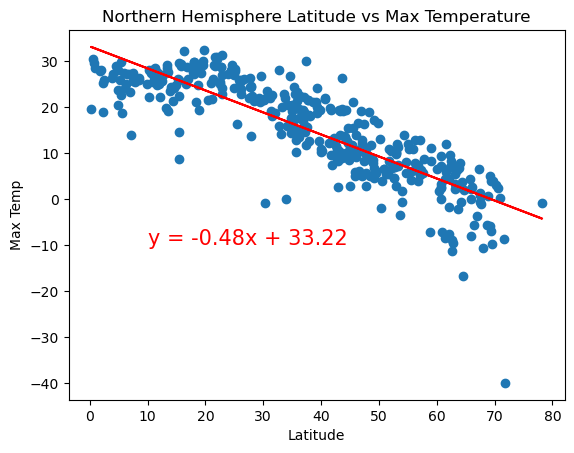

In [46]:
# Linear regression on Northern Hemisphere
x_axis = np.array(northern_hemi_df['Lat'])
y_axis = np.array(northern_hemi_df['Max Temp'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern Hemisphere Latitude vs Max Temperature', 10, -10)

The r-value is: 0.7304632477515457


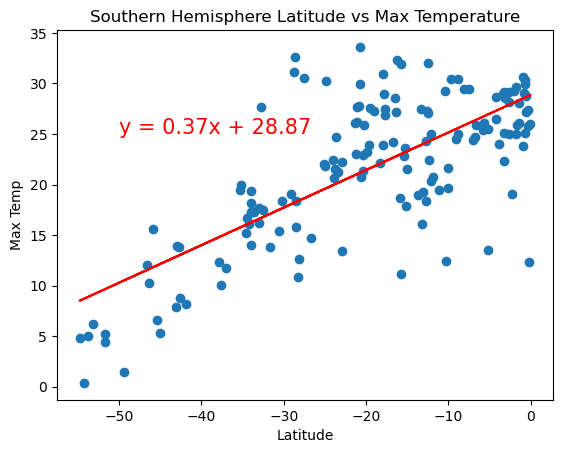

In [47]:
# Linear regression on Southern Hemisphere
x_axis = np.array(southern_hemi_df['Lat'])
y_axis = np.array(southern_hemi_df['Max Temp'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern Hemisphere Latitude vs Max Temperature', -50, 25)

**Discussion about the linear relationship:** The closer to the equator, the higher the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16205972112713093


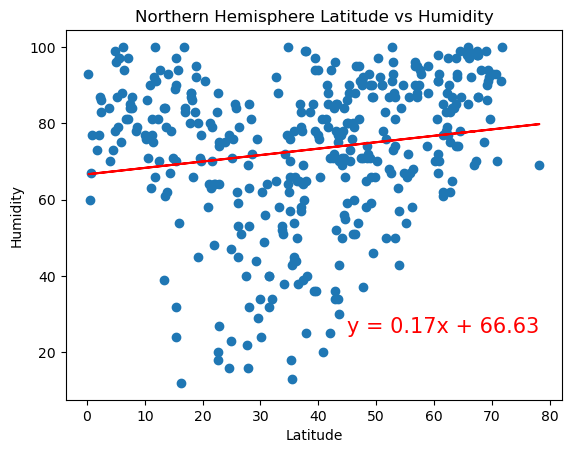

In [48]:
# Northern Hemisphere
x_axis = np.array(northern_hemi_df['Lat'])
y_axis = np.array(northern_hemi_df['Humidity'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern Hemisphere Latitude vs Humidity', 45, 25)

The r-value is: 0.04747013418884523


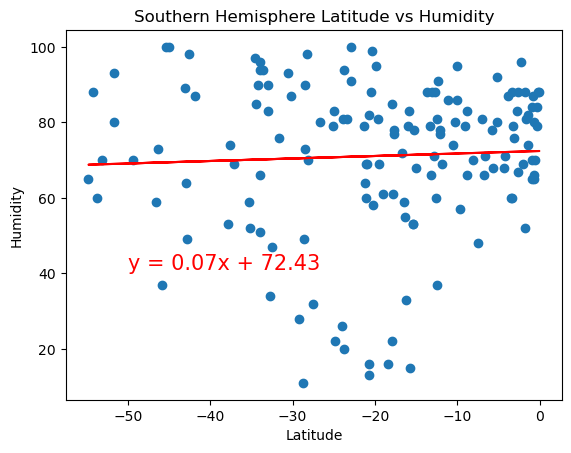

In [49]:
# Southern Hemisphere
x_axis = np.array(southern_hemi_df['Lat'])
y_axis = np.array(southern_hemi_df['Humidity'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern Hemisphere Latitude vs Humidity', -50, 41)

**Discussion about the linear relationship:** There isn't much correlation between latitude and humidity. The data is fairly evenly spread in the Northern and Southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15390493111446973


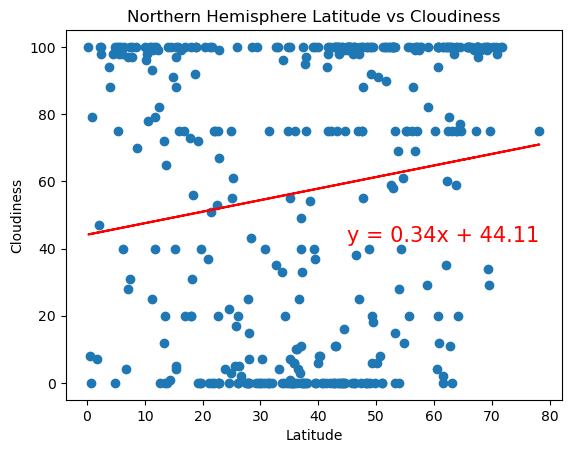

In [50]:
# Northern Hemisphere
x_axis = np.array(northern_hemi_df['Lat'])
y_axis = np.array(northern_hemi_df['Cloudiness'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern Hemisphere Latitude vs Cloudiness', 45, 42)

The r-value is: 0.030409781367391572


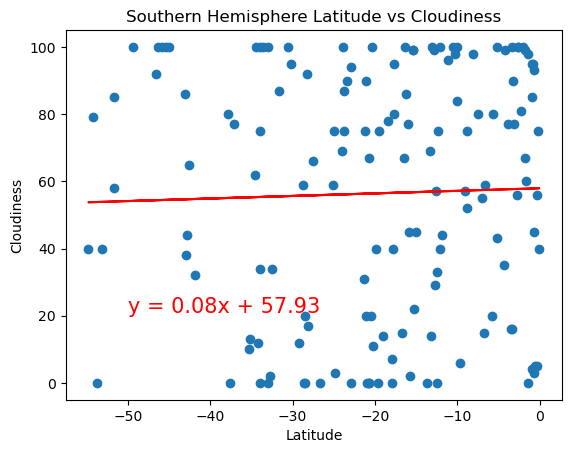

In [51]:
# Southern Hemisphere
x_axis = np.array(southern_hemi_df['Lat'])
y_axis = np.array(southern_hemi_df['Cloudiness'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern Hemisphere Latitude vs Cloudiness', -50, 21)

**Discussion about the linear relationship:** There isn't much correlation between latitude and cloudiness in the Southern hemisphere. The data is fairly evenly spread. However in the Northern Hemisphere, there is slight increase in clouds the further away from the equator you are.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24471125839139085


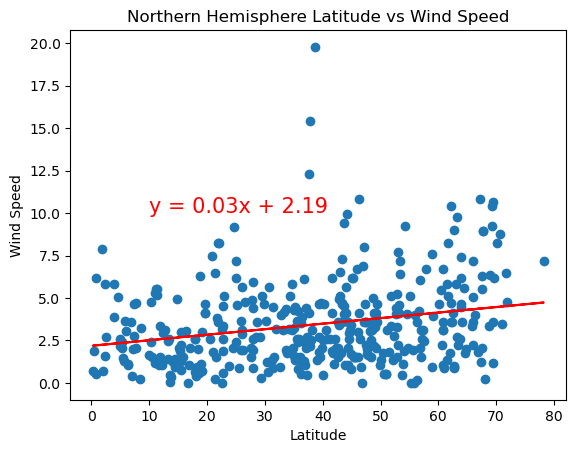

In [52]:
# Northern Hemisphere
x_axis = np.array(northern_hemi_df['Lat'])
y_axis = np.array(northern_hemi_df['Wind Speed'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern Hemisphere Latitude vs Wind Speed', 10, 10)

The r-value is: -0.29576952879070195


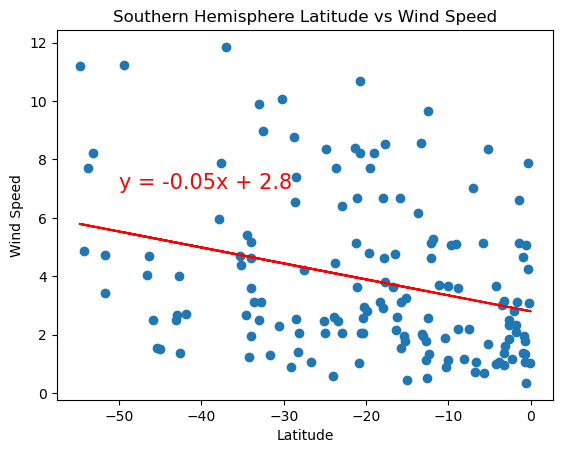

In [53]:
# Southern Hemisphere
x_axis = np.array(southern_hemi_df['Lat'])
y_axis = np.array(southern_hemi_df['Wind Speed'])
lin_regress_plot(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern Hemisphere Latitude vs Wind Speed', -50, 7)

**Discussion about the linear relationship:** WInd speeds increase the further away from equator you are.